In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import SVR
from functools import reduce

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "./drive/MyDrive/5212Project/Data_COMP5212project.xlsx" 

In [5]:
df_er = pd.read_excel (path, sheet_name='ER')
print(df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [6]:
df_er['ER_datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [7]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [8]:
df_er=df_er.drop(columns='Date')

In [9]:
df_var = pd.read_excel (path, sheet_name='Variables')
df_var['DLTINT_USEA'] = df_var['LTINT_USA'] - df_var['LTINT_EA19']

In [10]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [11]:
df_var['Var_datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Var_datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01


In [12]:
df_var=df_var.drop(columns='Date')

In [13]:
df_var["Current_EUR_USD"] = df_er["EUR_USD"].copy()
df_var = df_var[:-1]
df_er = df_er[1:].reset_index(drop=True)
df_all = df_var.copy()
df_all[df_er.columns] = df_er

In [14]:
df_all = df_all.set_index("Var_datetime")

In [15]:
df_all.head()

,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Current_EUR_USD,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
Var_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1.1366,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1.1025,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1.0770,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1.0570,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01
1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1.0423,8.2787,121.04,1.0357,1.4623,0.6683,1.5480,1.5775,1999-06-01


In [16]:
df_all.to_csv("df_all.csv",index=False) ##Export the data for future use

In [17]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19', 'DLTINT_USEA', 'Current_EUR_USD']]

In [18]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
Var_datetime,,,,,,,,,,,,,
1999-01-01,1.1025,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220,0.8980,1.1366
1999-02-01,1.0770,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742,1.0258,1.1025
1999-03-01,1.0570,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810,1.0490,1.0770
1999-04-01,1.0423,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407,1.1393,1.0570
1999-05-01,1.0357,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049,1.3351,1.0423


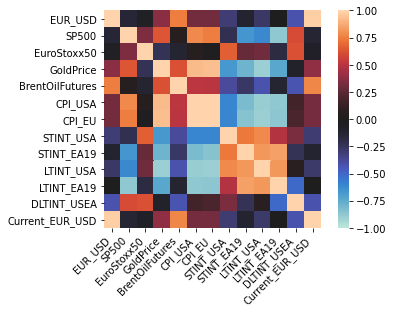

In [19]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
df_usdeu.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_usdeu

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
Var_datetime,,,,,,,,,,,,,
2003-09-01,1.1584,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660
2003-10-01,1.1994,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584
2003-11-01,1.2588,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994
2003-12-01,1.2469,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588
2004-01-01,1.2490,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,1.1647,3363.00,3193.61,1907.8,40.95,109.81490,105.73,0.13,-0.4914,0.68,0.1230,0.5570,1.1718
2020-10-01,1.1928,3269.96,2958.21,1892.4,37.46,109.86050,105.92,0.12,-0.5091,0.79,0.0005,0.7895,1.1647
2020-11-01,1.2213,3621.63,3492.54,1784.8,47.59,109.79340,105.63,0.16,-0.5209,0.87,-0.0553,0.9253,1.1928


In [22]:
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)

#### XGBoost

In [23]:
import xgboost as xgb

[03:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.02 degrees.
MAE: 0.019958162059481192
MSE: 0.0008069994935147446
RMSE: 0.028407736508119483
R-squared:  0.9507903376670273
Accuracy: 98.44 %.


Text(0, 0.5, 'Predictions')

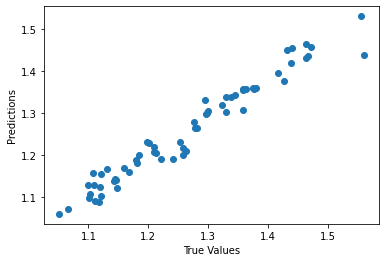

In [24]:
usdeu_x_train, usdeu_x_valid, usdeu_y_train, usdeu_y_valid = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=15)

xgb_reg = xgb.XGBRegressor(n_estimators=2000, 
                               max_depth=3,
                               learning_rate=0.1,
                               reg_alpha=0.3,
                               reg_lambda=0.3,
                               subsample=0.6,
                               random_state=38)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_valid)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_valid, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_valid, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_valid, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Deep Learning

In [25]:
df_usdeu_12m = pd.DataFrame()
for i in range(12):
    df_usdeu_12m[list(map(lambda x: "{}th".format(i+1)+x, df_usdeu.drop("EUR_USD", axis=1).columns))] = df_usdeu.shift(-i).drop("EUR_USD", axis=1)
df_usdeu_12m = df_usdeu_12m.dropna()

In [26]:
df_usdeu_12m

,1thSP500,1thEuroStoxx50,1thGoldPrice,1thBrentOilFutures,1thCPI_USA,1thCPI_EU,1thSTINT_USA,1thSTINT_EA19,1thLTINT_USA,1thLTINT_EA19,1thDLTINT_USEA,1thCurrent_EUR_USD,2thSP500,2thEuroStoxx50,2thGoldPrice,2thBrentOilFutures,2thCPI_USA,2thCPI_EU,2thSTINT_USA,2thSTINT_EA19,2thLTINT_USA,2thLTINT_EA19,2thDLTINT_USEA,2thCurrent_EUR_USD,3thSP500,3thEuroStoxx50,3thGoldPrice,3thBrentOilFutures,3thCPI_USA,3thCPI_EU,3thSTINT_USA,3thSTINT_EA19,3thLTINT_USA,3thLTINT_EA19,3thDLTINT_USEA,3thCurrent_EUR_USD,4thSP500,4thEuroStoxx50,4thGoldPrice,4thBrentOilFutures,...,9thLTINT_USA,9thLTINT_EA19,9thDLTINT_USEA,9thCurrent_EUR_USD,10thSP500,10thEuroStoxx50,10thGoldPrice,10thBrentOilFutures,10thCPI_USA,10thCPI_EU,10thSTINT_USA,10thSTINT_EA19,10thLTINT_USA,10thLTINT_EA19,10thDLTINT_USEA,10thCurrent_EUR_USD,11thSP500,11thEuroStoxx50,11thGoldPrice,11thBrentOilFutures,11thCPI_USA,11thCPI_EU,11thSTINT_USA,11thSTINT_EA19,11thLTINT_USA,11thLTINT_EA19,11thDLTINT_USEA,11thCurrent_EUR_USD,12thSP500,12thEuroStoxx50,12thGoldPrice,12thBrentOilFutures,12thCPI_USA,12thCPI_EU,12thSTINT_USA,12thSTINT_EA19,12thLTINT_USA,12thLTINT_EA19,12thDLTINT_USEA,12thCurrent_EUR_USD
Var_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-09-01,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,...,4.72,4.3862,0.3338,1.2186,1140.84,2811.08,392.6,34.50,80.03645,81.75,1.46,2.1127,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188
2003-10-01,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,...,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432
2003-11-01,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,...,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785
2003-12-01,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,...,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293
2004-01-01,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,79.06606,80.98,1.05,2.0288,3.83,4.0194,-0.1894,1.2315,1107.30,2787.48,387.0,34.48,...,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293,1211.92,2951.01,437.5,40.46,80.28960,82.43,2.45,2.1

In [27]:
usdeu_12m_x = df_usdeu_12m
usdeu_12m_y = df_usdeu["EUR_USD"]["2004-08-01":]

In [28]:
usdeu_12m_y

Var_datetime
2004-08-01    1.2432
2004-09-01    1.2785
2004-10-01    1.3293
2004-11-01    1.3558
2004-12-01    1.3034
               ...  
2020-09-01    1.1647
2020-10-01    1.1928
2020-11-01    1.2213
2020-12-01    1.2136
2021-01-01    1.2074
Name: EUR_USD, Length: 198, dtype: float64

In [29]:
import torch
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils import weight_norm
import random
torch.use_deterministic_algorithms(True) ## For Reproducibility

In [30]:
class DataSet(Dataset):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.len = len(x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx], self.z[idx]
      
    def __len__(self):
        return self.len

class MSE_Sim_loss(torch.nn.Module):
    def __init__(self, alpha=1, beta=1):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.alpha = alpha
        self.beta = beta

    def forward(self, pred, y_true, current):
        true_diff = y_true.view(-1) - current.view(-1)
        pred_diff = pred.view(-1) - current.view(-1)
        similarity = true_diff.dot(pred_diff)/(torch.norm(true_diff)*torch.norm(pred_diff))
        MSEloss = torch.nn.L1Loss().to(self.device)
        return self.alpha*MSEloss(pred, y_true) + self.beta*(1 - similarity)


class LSTM_model(torch.nn.Module):
    def __init__(self, input_size=12, hidden_size=12, num_layers=3, middle_feature=20, seed=None):
        super().__init__()
        if seed != None:
            torch.manual_seed(seed)
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, )
        self.linear = torch.nn.Linear(in_features=12*hidden_size, out_features=middle_feature)
        self.outlayer = torch.nn.Linear(in_features=middle_feature, out_features=1)
        self.normlayer = torch.nn.InstanceNorm1d(12)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []
    
    def forward(self, x):
        x, (hn, cn) = self.lstm(x)
        x = self.normlayer(x)
        x = F.relu(x)
        x = x.reshape(x.shape[0], -1)
        x = self.linear(x)
        x = F.relu(x)
        x = self.outlayer(x)
        return x

    def fit(self, x, y, z, epochs=20, lr=0.001, alpha=1, beta=1, batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)
        if batch_size == None:
            batch_size = len(x)//10
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()
                
            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())
            
    
    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 
    
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

loss:  1.9618701392954045
loss:  1.3539238951422952
loss:  0.9406222646886652
loss:  0.8281055255369707
loss:  0.7709893204949119
loss:  0.7269224280660803
loss:  0.6687471189282157
loss:  0.6913550712845542
loss:  0.6006346101110632
loss:  0.6052456010471691
loss:  0.5685842091386969
loss:  0.5849454186179421
loss:  0.5791949277574365
loss:  0.5647860359061848
loss:  0.50075409358198
loss:  0.5451624366370115
loss:  0.5608673922040246
loss:  0.49395852197300305
loss:  0.3993324921889739
loss:  0.42047191478989343
Mean Absolute Error: 0.05 degrees.
MAE: 0.04713294773419698
MSE: 0.004048027888704336
RMSE: 0.06362411405044738
R-squared:  0.7430918931899506
Accuracy: 96.28 %.


Text(0, 0.5, 'Predictions')

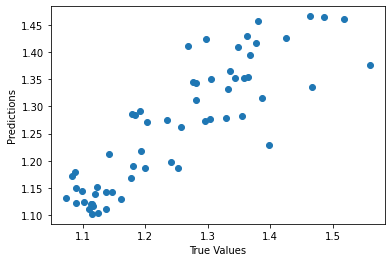

In [31]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_12m_x, usdeu_12m_y, test_size = 0.3, random_state=3)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
lstm_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.00001)
lstm_model.load_best_state_dict()
predictions = lstm_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu12m_y_valid, predictions))
print('MSE:', metrics.mean_squared_error(usdeu12m_y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu12m_y_valid, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu12m_y_valid, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### TCNN

In [32]:
usdeu_t_12m_x = usdeu_12m_x[["{}th".format(i+1) + "Current_EUR_USD" for i in range(12)]]

In [33]:
class Temporal_block(torch.nn.Module):
    def __init__(self, dilation_size):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.padding = torch.nn.ConstantPad1d((dilation_size*2,0),0)
        self.conv1d_1 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=dilation_size))
        self.conv1d_2 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=dilation_size))

    def forward(self, x):
        out = self.conv1d_1(x)
        out = F.relu(self.padding(out))
        out = self.conv1d_2(out)
        out = F.relu(self.padding(out))
        return F.relu(out+x)


class TCNN(torch.nn.Module):
    def __init__(self, seed=None):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if seed != None:
          torch.manual_seed(seed)
        
        self.temp_block_d1 = Temporal_block(dilation_size=1)
        self.temp_block_d2 = Temporal_block(dilation_size=2)
        self.temp_block_d4 = Temporal_block(dilation_size=4)
        self.linear = torch.nn.Linear(12, 1)
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x = self.temp_block_d1(x)
        x = self.temp_block_d2(x)
        x = self.temp_block_d4(x)
        x = x.view(x.shape[0],-1)
        x = F.relu(self.linear(x))
        return x

    def fit(self, x, y, z,epochs=20, lr=0.001, alpha=1, beta=1,  batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)
        
        if batch_size == None:
            batch_size = len(x)//10
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.RMSprop(self.parameters(), lr=lr)
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()
           
            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())
      
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 

loss:  1.5712929205460981
loss:  1.1670065847310154
loss:  1.083607093854384
loss:  1.0184281034903093
loss:  1.051011860370636
loss:  0.9941171678629789
loss:  1.051041223786094
loss:  1.10965158180757
loss:  1.048257914456454
loss:  1.0179675925861706
loss:  1.0416060848669573
loss:  1.1036393154751172
loss:  1.0149746320464395
loss:  1.0354148284955458
loss:  1.0723428238521924
loss:  1.032981818372553
loss:  1.0415296933867715
loss:  1.0320309725674717
loss:  1.0308351652188734
loss:  0.9766179431568492
[1.4103367 1.2808372 1.2912608 1.1277653 1.3300388 1.1444753 1.2714795
 1.1012071 1.2194294 1.455692  1.1696075 1.4126298 1.2761849 1.2747768
 1.1691997 1.2655537 1.3547875 1.251942  1.1441678 1.1170577 1.1867933
 1.2020662 1.2081032 1.1609153 1.1344508 1.2208631 1.2978045 1.1927634
 1.2793404 1.4639419 1.2083476 1.2800487 1.3153281 1.2595109 1.293167
 1.2102023 1.3724948 1.3011495 1.3411138 1.1443197 1.1589789 1.2480297
 1.1230536 1.2884144 1.1871216 1.1950434 1.1268686 1.1821376 1

Text(0, 0.5, 'Predictions')

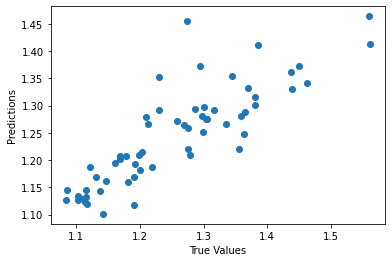

In [34]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=35)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
TCNN_model = TCNN(seed=57)
TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.001)
#TCNN_model.load_best_state_dict()
predictions = TCNN_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
print(predictions)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [35]:
# import random

# while accuracy < 96:
#     param = [random.randint(0,100),57]
#     usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=param[0])
#     current = usdeu12m_x_train["12thCurrent_EUR_USD"]
#     TCNN_model = TCNN(seed=param[1])
#     TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.001)
#     TCNN_model.load_best_state_dict()
#     predictions = TCNN_model.predict(usdeu12m_x_valid)
#     # Use the forest's predict method on the test data
#     # Calculate the absolute errors
#     errors = abs(predictions - usdeu12m_y_valid)
#     print(predictions)
#     # Print out the mean absolute error (mae)
#     # print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#     # print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
#     # print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
#     # print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
#     # print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

#     # Calculate mean absolute percentage error (MAPE)
#     mape = 100 * (errors / usdeu12m_y_valid)
#     # Calculate and display accuracy
#     accuracy = 100 - np.mean(mape)
#     print('Accuracy:', round(accuracy, 2), '%.')
#     print(param)

### Performance Evaluation

In [36]:
# def accum_return_without_transaction_fee(current, pred, y_true):
#     rate = np.ones(len(pred))
#     rate[pred > current] = 1 + (y_true[pred > current] - current[pred > current])/current[pred > current]
#     rate[pred < current] = 1 - (y_true[pred < current] - current[pred < current])/current[pred < current]
#     return reduce(lambda a, b: a*b, rate), rate, [reduce(lambda a, b: a*b, rate[:i+1]) for i, r in enumerate(rate)]

#### Accumulated Return

In [37]:
def accum_return(current, pred, y_true):
    hold_signal = False
    short_signal = False
    profit = []
    for i, price in enumerate(pred.tolist()):
        if price > current[i]:
            if hold_signal:
                profit.append(1+ (y_true[i] - current[i])/current[i])
            else:
                if len(profit) > 0:
                    profit[-1] = 1+(current[i-1] - current[i]*1.002)/current[i-1]  ### Price is predicted up, buy back to close short pos and update the previous profit
                profit.append(1+ (y_true[i] - current[i]*1.002)/current[i]*1.002)  ### Start long position
                hold_signal = True
                short_signal = False
        elif price < current[i]:
            if short_signal:
                profit.append(1 + (current[i] - y_true[i])/current[i])
            else:
                if len(profit) > 0:
                    profit[-1] = 1+ (current[i]*0.998 - current[i-1])/current[i-1] ### Price is predicted down, sell all to close long pos and update the previous profit
                profit.append(1 + (current[i]*0.998 - y_true[i])/current[i]*0.998) ### Start short position
                short_signal = True
                hold_signal = False
    return reduce(lambda x,y: x*y, profit),  profit, [reduce(lambda x,y: x*y, profit[:k+1]) for k, rate in enumerate(profit)]

#### DMTest

In [38]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [39]:
n_month = 108

##### XGBoost

In [40]:
xgb_prediction = []
i = 0
while True:
    xgb_reg = xgb.XGBRegressor(n_estimators=2000, max_depth=3, learning_rate=0.1, reg_alpha=0.3, reg_lambda=0.3, subsample=0.6, random_state=38)
    xgb_reg.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    xgb_prediction.append(xgb_reg.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

[03:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[03:32

In [41]:
current = usdeu_y.iloc[-n_month-1:-1]
xgb_total_profit, xgb_profit, xgb_cum_profit = accum_return(current, np.array(xgb_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(xgb_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-3.8181184054521395, p_value=0.00022572805758159907)


In [42]:
xgb_cum_profit

[0.9993480414227827,
 1.0051264491406275,
 1.0720842684867027,
 1.0458850898912193,
 1.0752954447096454,
 1.0514368900602846,
 1.0279452969850726,
 1.0197908079282616,
 1.0177449313074178,
 1.001286712027073,
 0.9722254199153445,
 1.00780146708015,
 0.9875283993828774,
 1.0122293963966456,
 1.0231459756285979,
 1.021963757569213,
 0.9970325581569304,
 1.0030288447794349,
 0.9799672225730404,
 0.9757650860279246,
 0.9752622624411906,
 0.9641397806018569,
 0.9804140055934127,
 1.001305757914279,
 1.00155163774946,
 0.9945696497148984,
 1.0114960532147697,
 1.0069695137645385,
 1.0292534578684427,
 1.0489329623283967,
 1.0889478419542646,
 1.0981718301658787,
 1.1045723526091609,
 1.1337392012023668,
 1.0553202817220342,
 1.0446257213334136,
 1.0860093586314468,
 1.1336306311803934,
 1.1551563715913642,
 1.137045184926614,
 1.1194886682519025,
 1.0940760309637634,
 1.0881690096012808,
 1.0692806075656056,
 1.110076699093074,
 1.1390183178395694,
 1.1343328202031822,
 1.128308028466516,
 1

##### Elastic Net

In [43]:
ENet_prediction = []
i = 0
while True:
    ENet = ElasticNet()
    ENet.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    ENet_prediction.append(ENet.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [44]:
current = usdeu_y.iloc[-n_month-1:-1]
ENet_total_profit, ENet_profit, ENet_cum_profit = accum_return(current, np.array(ENet_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(ENet_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-7.114877850999157, p_value=1.3317598989375054e-10)


In [45]:
ENet_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0149150009907768,
 1.0519008621700556,
 1.0688492280835125,
 1.0955842987990059,
 1.107348302078653,
 1.1064112429723476,
 1.0815786462815,
 1.088083404340628,
 1.063066209141751,
 1.0585077409966808,
 1.0579622791160141,
 1.045896636171199,
 1.0656032583717185,
 1.0407152160800974,
 1.0430527158408918,
 1.0357814166817365,
 1.053409195894031,
 1.0486950912098894,
 1.0719024102747883,
 1.090294555193906,
 1.0464336704427644,
 1.0375698006883805,
 1.0315224876783804,
 1.0022800014793385,
 0.9350968391353643,
 0.9274755679446792,
 0.8889550124700207,
 0.9297950852635833,
 0.910244867861391,
 0.9226708534983775,
 0.910244867861391,
 0.9290495261253641,
 0.925901609763994,
 0.9116531462335828,
 0.8751207484608422,
 0.8996413601178291,
 0.8977360423201579,
 0.9007182788730346,
 0.9408

##### SVM

In [46]:
SVR_prediction = []
i = 0
while True:
    svr = SVR()
    svr.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    SVR_prediction.append(svr.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [47]:
current = usdeu_y.iloc[-n_month-1:-1]
SVR_total_profit, SVR_profit, SVR_cum_profit = accum_return(current, np.array(SVR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(SVR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-7.237258153417014, p_value=7.281244069695706e-11)


In [48]:
SVR_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0169488987883537,
 0.9777807513499334,
 0.9601064056607035,
 0.9860936851274947,
 0.9735119475182126,
 0.9743357517664393,
 0.9962040099920966,
 0.9902127063686289,
 1.0129796601378063,
 1.0173233552648204,
 1.0178475943318739,
 1.027396833612138,
 1.0447388078385085,
 1.067094688593771,
 1.0646979391845255,
 1.0721201309034796,
 1.0538739095943843,
 1.058590093915803,
 1.0351638013028548,
 1.015371290052311,
 0.9766367270190205,
 0.9683640758322697,
 0.962720117545982,
 0.9354281000794118,
 0.8727260429536656,
 0.8656131092230014,
 0.8296618680843183,
 0.8677779151410296,
 0.8495316938319345,
 0.8611288683928,
 0.8495316938319346,
 0.8670820846673777,
 0.864144133778625,
 0.8508460402821659,
 0.8167503470732213,
 0.8396354382066626,
 0.8378572047739966,
 0.8406405266686042,
 0.8

RandomForestRegressor

In [49]:
RFR_prediction = []
i = 0
while True:
    RFR = RandomForestRegressor()
    RFR.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    RFR_prediction.append(RFR.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [50]:
current = usdeu_y.iloc[-n_month-1:-1]
RFR_total_profit, RFR_profit, RFR_cum_profit = accum_return(current, np.array(RFR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(RFR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-2.7593203616398396, p_value=0.006815093674727158)


In [51]:
RFR_cum_profit

[0.999349444394417,
 0.9895776281845411,
 1.0536523311604138,
 1.0773410554571827,
 1.0470461568993028,
 1.068137363157663,
 1.042188369182342,
 1.0339208926185997,
 1.0318466686056302,
 1.0151604064458286,
 0.9856964449674449,
 1.021765429071354,
 1.0012114604664948,
 1.0262547111827154,
 1.0373225490726954,
 1.036123950358404,
 1.0108473075901032,
 1.0149171420815553,
 1.0361755956184786,
 1.0296731152735852,
 1.029142512225373,
 1.017405547366648,
 1.0345788733911856,
 1.0566248309723476,
 1.0568842949145392,
 1.0495165734482843,
 1.0673781088441014,
 1.062601491967901,
 1.0840383828030133,
 1.061097514162794,
 1.0206185790683329,
 1.0119733773615316,
 1.0060752490942748,
 0.9775541630895945,
 0.9120283819287002,
 0.9045951243864039,
 0.8670248552867542,
 0.905043705319826,
 0.9222289641911503,
 0.9077697434926615,
 0.8937008160181955,
 0.9121636923593067,
 0.9090729905929532,
 0.8950834983873536,
 0.8592150910462519,
 0.883290031121005,
 0.8814193432097911,
 0.8825786817092015,
 0.

##### Linear Regression

In [52]:
LR_prediction = []
i = 0
while True:
    LR = LinearRegression()
    LR.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    LR_prediction.append(LR.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [53]:
current = usdeu_y.iloc[-n_month-1:-1]
LR_total_profit, LR_profit, LR_cum_profit = accum_return(current, np.array(LR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(LR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-2.0834618131593667, p_value=0.03959154369992778)


In [54]:
LR_cum_profit

[0.9966559585772174,
 1.0044236608922676,
 1.0713346630755745,
 1.0451538030457295,
 1.0745435940318495,
 1.0507017213749332,
 1.027226553711233,
 1.0190777663042845,
 1.0170333201681803,
 0.9985196484739559,
 1.0254456282217785,
 1.062815249929295,
 1.0820266775475023,
 1.0527393720007798,
 1.066171453302225,
 1.0652692388252405,
 1.0413600445333904,
 1.0476229225639626,
 1.0213925743745325,
 1.0237342332172448,
 1.0242617758874832,
 1.0359430778713372,
 1.0143911510743653,
 0.9887218688990476,
 0.9909425889349751,
 0.9840345583970506,
 1.0007816670565806,
 0.9963030754865967,
 1.018350974396357,
 1.0378220214831797,
 1.077413038978274,
 1.0865393210532166,
 1.0928720452397942,
 1.1238537214339517,
 1.1991860107209122,
 1.2065808494730617,
 1.153950087674817,
 1.2069644752643878,
 1.1815863911444309,
 1.1977165293562677,
 1.1815863911444309,
 1.203584673637734,
 1.2052522914479706,
 1.223799611312787,
 1.2704910416082094,
 1.3034776265090329,
 1.3036309519656817,
 1.299300351774599,
 

##### LSTM

In [55]:
unSim_lstm_prediction = []
i = 0
while True:
    unSim_lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
    unSim_lstm_model.fit(x=usdeu_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_12m_x.iloc[:-n_month + i]["12thCurrent_EUR_USD"] , alpha=1, beta=0, epochs=20, lr=0.00001)
    unSim_lstm_model.load_best_state_dict()
    print("Finish 1 month")
    unSim_lstm_prediction.append(unSim_lstm_model.predict(usdeu_12m_x.iloc[-n_month+i])[0])
    i += 1
    if i == n_month:
        break

loss:  1.0426973819732666
loss:  0.4998560845851898
loss:  0.1328393764793873
loss:  0.13333717808127404
loss:  0.08915572240948677
loss:  0.07016682140529155
loss:  0.066172643750906
loss:  0.061022186279296876
loss:  0.057002574950456616
loss:  0.05576700679957867
loss:  0.050948981568217276
loss:  0.048390810005366804
loss:  0.04717089999467135
loss:  0.04396213963627815
loss:  0.0413585277274251
loss:  0.041105367615818976
loss:  0.03800994036719203
loss:  0.03688344564288855
loss:  0.034658171236515045
loss:  0.033245330676436424
Finish 1 month
loss:  1.0047727118838916
loss:  0.4229024120352485
loss:  0.13446457209912213
loss:  0.11628171869299629
loss:  0.0947490083900365
loss:  0.06777475300160321
loss:  0.058773095296187836
loss:  0.05606371570717205
loss:  0.05516927215186032
loss:  0.05071443657983433
loss:  0.05373360419815237
loss:  0.05478345297954299
loss:  0.04963394051248377
loss:  0.0510520183227279
loss:  0.04645237089558081
loss:  0.05349882336502725
loss:  0.048168

In [56]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
unSim_lstm_total_profit, unSim_lstm_profit, unSim_lstm_cum_profit = accum_return(current, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(unSim_lstm_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-4.4287783956077, p_value=2.2955222271698713e-05)


In [57]:
unSim_lstm_cum_profit

[0.9966559585772174,
 1.0044236608922676,
 1.0713346630755745,
 1.0429587719995188,
 1.0114819599128888,
 1.0339246269363138,
 1.05491090462279,
 1.0444159440597673,
 1.0444224039657917,
 1.0591894075656185,
 1.0263948923638742,
 1.065926855594326,
 1.0831012101702162,
 1.110192764979923,
 1.1221658486749695,
 1.120868525505093,
 1.1460256054011335,
 1.1368549882351946,
 1.1083904505279463,
 1.1109169841942688,
 1.108128269832305,
 1.0954905035293097,
 1.1161315656865984,
 1.0900633931358992,
 1.09251173143377,
 1.084895645004488,
 1.1033592905097205,
 1.0962050606269231,
 1.069701047336267,
 1.0492481779570688,
 1.00922127342981,
 0.9986712679551102,
 1.0024868779131022,
 1.0289581026506212,
 0.9577867234526355,
 0.9499805240765155,
 0.910525277229822,
 0.9504516112388658,
 0.9685752263176067,
 0.97988291438856,
 0.9666864305352396,
 0.9846837952143981,
 0.986048116537457,
 0.9992804111602945,
 0.9571539071332459,
 0.9820051163010334,
 0.9821250185831893,
 0.9834259379208523,
 1.02722

In [58]:
lstm_prediction = []
i = 0
while True:
    lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
    lstm_model.fit(x=usdeu_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_12m_x.iloc[:-n_month + i]["12thCurrent_EUR_USD"] , alpha=1, beta=1, epochs=20, lr=0.00001)
    lstm_model.load_best_state_dict()
    print("Finish 1 month")
    lstm_prediction.append(lstm_model.predict(usdeu_12m_x.iloc[-n_month+i])[0])
    i += 1
    if i == n_month:
        break

loss:  2.0612836360931395
loss:  1.5163750171661377
loss:  0.9006324052810669
loss:  1.1257188856601714
loss:  0.959817773103714
loss:  0.8668454051017761
loss:  0.8408278912305832
loss:  0.8281181156635284
loss:  0.7896792531013489
loss:  0.6879509031772614
loss:  0.7494489192962647
loss:  0.604441374540329
loss:  0.6421563535928726
loss:  0.5714195102453232
loss:  0.5444285184144974
loss:  0.5340645641088486
loss:  0.5049417957663536
loss:  0.519614876806736
loss:  0.5324342668056488
loss:  0.5322236597537995
Finish 1 month
loss:  2.1182186278429898
loss:  1.530885468829762
loss:  0.9568707942962646
loss:  0.9911557544361461
loss:  0.8623434738679365
loss:  0.7108409106731415
loss:  0.7167116186835549
loss:  0.6346351504325867
loss:  0.6505700295621698
loss:  0.5693362734534524
loss:  0.6060745336792686
loss:  0.6273192004723982
loss:  0.5961716852404855
loss:  0.5409952618859031
loss:  0.5505617504770105
loss:  0.6059588938951492
loss:  0.7025554911656813
loss:  0.5099263326688246
l

In [59]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
lstm_total_profit, lstm_profit, lstm_cum_profit = accum_return(current, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(lstm_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-4.582111349088825, p_value=1.2515747060267271e-05)


In [60]:
lstm_cum_profit

[0.9993480414227827,
 1.0051264491406275,
 1.0720842684867027,
 1.043688522997055,
 1.0123112559069394,
 0.9877806438950993,
 1.0079146318152092,
 1.0159102215216296,
 1.017948313015423,
 1.0344098212345234,
 1.0623036117473859,
 1.1011758348149117,
 1.0791084600124472,
 1.047804658250672,
 1.0591049056176431,
 1.0578804864865405,
 1.0816238455990748,
 1.0729685780738192,
 1.046103626197515,
 1.0484881794285459,
 1.0458561789407306,
 1.031813033785315,
 1.0103470290913152,
 0.9846816525394652,
 0.9805050670226584,
 0.9716951175663384,
 0.9532476956264272,
 0.9470876723695013,
 0.9680464486423584,
 0.986555664480169,
 1.024190963947508,
 1.0328664257225544,
 1.0388863258485221,
 1.0683375684621206,
 1.1399485915237604,
 1.1492394553100989,
 1.1969704616265686,
 1.1394757239036637,
 1.1131852559479227,
 1.1261248694927617,
 1.1390689357786246,
 1.1603652173974865,
 1.1541206625753013,
 1.169541985076008,
 1.214163332859546,
 1.2456874448376525,
 1.245839542586442,
 1.2474897772530162,
 1

##### TCNN

In [61]:
tcnn_prediction = []
i = 0
while True:
    TCNN_model = TCNN(seed=57)
    TCNN_model.fit(x=usdeu_t_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_t_12m_x.iloc[:-n_month+i]["12thCurrent_EUR_USD"], alpha=2, beta=0.2, epochs=20, lr=0.001)
    TCNN_model.load_best_state_dict()
    print("Finish 1 month")
    tcnn_prediction.append(TCNN_model.predict(usdeu_t_12m_x.iloc[-n_month + i])[0])
    i += 1
    if i == n_month:
        break

loss:  1.1750888586044312
loss:  0.37543919682502747
loss:  0.3248249441385269
loss:  0.3367494210600853
loss:  0.33723628968000413
loss:  0.3295639127492905
loss:  0.3250176697969437
loss:  0.3368843629956245
loss:  0.3215912029147148
loss:  0.3465135425329208
loss:  0.3194409444928169
loss:  0.32921270877122877
loss:  0.3336602449417114
loss:  0.32810151427984235
loss:  0.3192372813820839
loss:  0.33973180651664736
loss:  0.32106253504753113
loss:  0.3013937219977379
loss:  0.33942939043045045
loss:  0.32952766865491867
Finish 1 month
loss:  1.1033228825439105
loss:  0.31669151376594196
loss:  0.3372272551059723
loss:  0.3463591364297
loss:  0.3657989772883328
loss:  0.3014142323624004
loss:  0.34176390956748615
loss:  0.2963093465024775
loss:  0.2863688645037738
loss:  0.2985444096001712
loss:  0.30260802669958636
loss:  0.35279812731526117
loss:  0.35593063045631756
loss:  0.3139537505128167
loss:  0.2912834801457145
loss:  0.31271206655285577
loss:  0.3684718825600364
loss:  0.358

In [62]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
tcnn_total_profit, tcnn_profit, tcnn_cum_profit = accum_return(current, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(tcnn_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-5.917172064187289, p_value=3.9933645722607905e-08)


In [63]:
tcnn_cum_profit

[0.999349444394417,
 0.9895776281845411,
 1.0536523311604138,
 1.0773410554571827,
 1.0470461568993028,
 1.068137363157663,
 1.042188369182342,
 1.0339208926185997,
 1.0318466686056302,
 1.0151604064458286,
 0.9856964449674449,
 1.021765429071354,
 1.0012114604664948,
 1.0262547111827154,
 1.0373225490726954,
 1.036123312276159,
 1.0572595907223423,
 1.061516288560316,
 1.0837508077770912,
 1.0769497710067488,
 1.0763948057242807,
 1.0641189470761117,
 1.0820807732665876,
 1.105235717404979,
 1.1005477946859292,
 1.090694338299335,
 1.1071124067198967,
 1.1098427046191188,
 1.1322326382705432,
 1.1082718628618615,
 1.0659933123940484,
 1.0569637616953336,
 1.050803414022379,
 1.0210143355490493,
 0.9525754045522496,
 0.9448116787178408,
 0.9055711079243614,
 0.9471745517978782,
 0.9272589072661337,
 0.9399171559091916,
 0.9272589072661338,
 0.9464150568792947,
 0.9432083005563867,
 0.9286935087790138,
 0.8914782577684236,
 0.9164572017573913,
 0.9145162702987891,
 0.917554249973123,
 0

### Visualization Result

In [64]:
from matplotlib import pyplot as plt

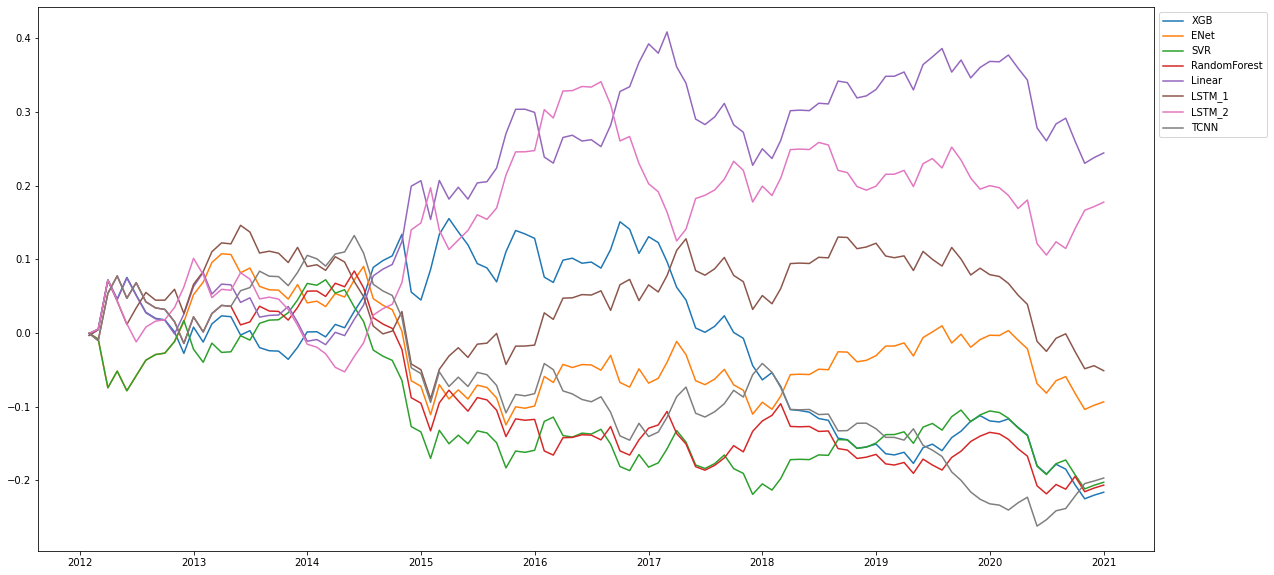

In [65]:
plt.figure(figsize = (20,10))
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(xgb_cum_profit) - 1, label="XGB")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(ENet_cum_profit) - 1, label="ENet")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(SVR_cum_profit) - 1, label="SVR")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(RFR_cum_profit) - 1, label="RandomForest")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(LR_cum_profit) - 1, label="Linear")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(unSim_lstm_cum_profit) - 1, label="LSTM_1")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(lstm_cum_profit) - 1, label="LSTM_2")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_cum_profit) - 1, label="TCNN")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

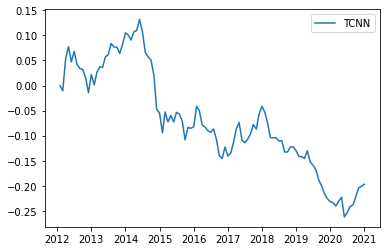

In [66]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_cum_profit) - 1, label="TCNN")
plt.legend()
plt.show()

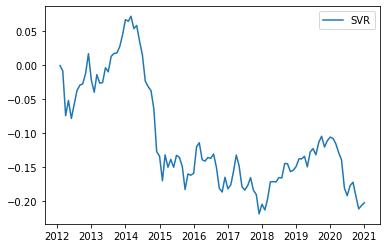

In [67]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(SVR_cum_profit) - 1, label="SVR")
plt.legend()
plt.show()

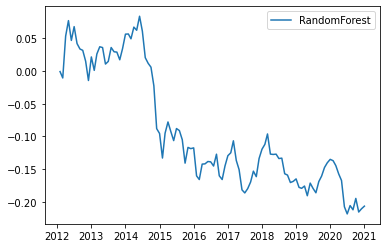

In [68]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(RFR_cum_profit) - 1, label="RandomForest")
plt.legend()
plt.show()

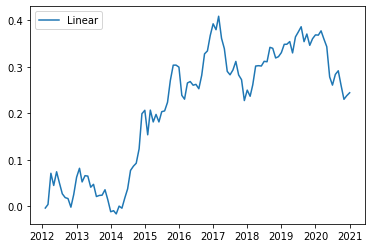

In [69]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(LR_cum_profit) - 1, label="Linear")
plt.legend()
plt.show()

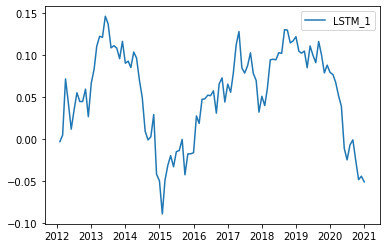

In [70]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(unSim_lstm_cum_profit) - 1, label="LSTM_1")
plt.legend()
plt.show()

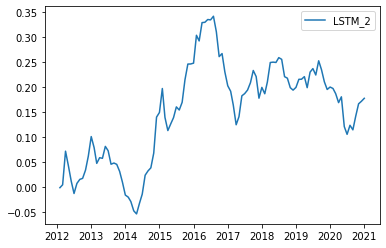

In [71]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(lstm_cum_profit) - 1, label="LSTM_2")
plt.legend()
plt.show()

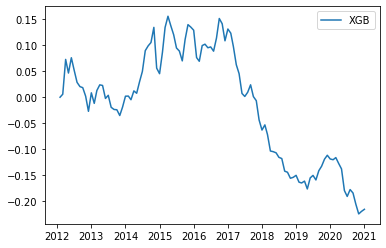

In [72]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(xgb_cum_profit) - 1, label="XGB")
plt.legend()
plt.show()

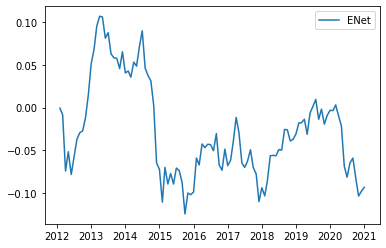

In [73]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(ENet_cum_profit) - 1, label="ENet")
plt.legend()
plt.show()

In [74]:
def classify_accuracy(current, prediction, y_true):
    go_up = (y_true > current)
    pred_go_up = (prediction > current)
    return (pred_go_up == go_up).sum()/len(go_up)

In [75]:
print("SVR accuracy: ",classify_accuracy(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("RandomForest accuracy: ",classify_accuracy(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LinearRegression accuracy: ",classify_accuracy(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_1 accuracy: ",classify_accuracy(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_2 accuracy: ",classify_accuracy(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("XGboost accuracy: ",classify_accuracy(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN accuracy: ",classify_accuracy(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("ElasticNet accuracy: ",classify_accuracy(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values))

SVR accuracy:  0.5092592592592593
RandomForest accuracy:  0.48148148148148145
LinearRegression accuracy:  0.5833333333333334
LSTM_1 accuracy:  0.5185185185185185
LSTM_2 accuracy:  0.5740740740740741
XGboost accuracy:  0.4537037037037037
TCNN accuracy:  0.4444444444444444
ElasticNet accuracy:  0.5185185185185185


In [79]:
print("SVR MAE: ",metrics.mean_absolute_error(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print('RandomForest MAE:', metrics.mean_absolute_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LinearRegression MAE: ",metrics.mean_absolute_error(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_1 MAE: ",metrics.mean_absolute_error(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_2 MAE: ",metrics.mean_absolute_error(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("XGboost MAE: ",metrics.mean_absolute_error(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN MAE: ",metrics.mean_absolute_error(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("ElasticNet MAE: ",metrics.mean_absolute_error(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values))

print('RandomForest MSE:', metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))

print('RandomForest RMSE:', np.sqrt(metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)))

print ('RandomForest R-squared: ',metrics.r2_score(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)) 



SVR MAE:  0.06393461473234055
RandomForest MAE: 0.010464574077124207
LinearRegression MAE:  0.01615511161182348
LSTM_1 MAE:  0.02465638329235354
LSTM_2 MAE:  0.0338521383058945
XGboost MAE:  0.015820522810945627
TCNN MAE:  0.04552083478795698
ElasticNet MAE:  0.06532489058467786
RandomForest MSE: 0.00018618125070126156
RandomForest RMSE: 0.013644825052057705
RandomForest R-squared:  0.9806207565301541


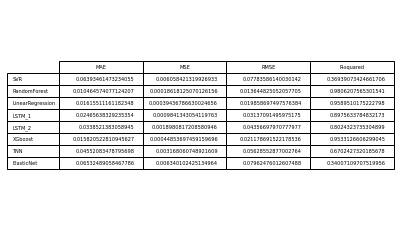

In [116]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[metrics.mean_absolute_error(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values)]]
column_labels=["MAE", "MSE", "RMSE", "R-squared"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["SVR","RandomForest","LinearRegression", "LSTM_1", "LSTM_2", "XGboost", "TNN", "ElasticNet"],loc="center")

plt.show()

In [76]:
predict_df = pd.DataFrame()
predict_df["SVR_Prediction"] = SVR_prediction
predict_df["RandomForest_Prediction"] = RFR_prediction
predict_df["XGBoost_Prediction"] = xgb_prediction
predict_df["LSTM_1_Prediction"] = lstm_prediction
predict_df["LSTM_2_Prediction"] = unSim_lstm_prediction
predict_df["TCNN_Prediction"] = tcnn_prediction
predict_df.index = usdeu_12m_y.iloc[-n_month:].index
predict_df.to_csv("./drive/MyDrive/5212Project/All_Prediction.csv")